In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import math  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.shape

(2111, 17)

In [6]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
encoder = LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])
df["SMOKE"]=encoder.fit_transform(df["SMOKE"])
df["SCC"]=encoder.fit_transform(df["SCC"])
df["FAVC"]=encoder.fit_transform(df["FAVC"])
df["'family_history_with_overweight'"]=encoder.fit_transform(df["family_history_with_overweight"])
df["CAEC"]=encoder.fit_transform(df["CAEC"])
df["CALC"]=encoder.fit_transform(df["CALC"])
df["MTRANS"]=encoder.fit_transform(df["MTRANS"])
df["NObeyesdad"]=encoder.fit_transform(df["NObeyesdad"])

df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,'family_history_with_overweight'
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,yes,0.0,1.0,2,3,1,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,yes,3.0,0.0,2,3,1,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,yes,2.0,1.0,2,3,1,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,no,2.0,0.0,2,4,5,0
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,no,0.0,0.0,2,3,6,0


In [9]:
df.value_counts()

Age   Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  'family_history_with_overweight'
21.0  1       1.62    70.0    2     1     2.0   1.0  0    0      3.0   no                              1.0  0.0  3     3       5           0                                   15
      0       1.52    42.0    2     1     3.0   1.0  0    0      1.0   no                              0.0  0.0  1     3       0           0                                    4
                                    0     3.0   1.0  0    0      1.0   no                              0.0  0.0  1     3       0           0                                    2
18.0  1       1.72    53.0    2     1     2.0   3.0  0    0      2.0   yes                             0.0  2.0  2     3       0           1                                    2
25.0  0       1.57    55.0    2     1     2.0   1.0  0    0      2.0   no                              2.0  0.0  2  

In [10]:
for column in df.columns:
    if df[column].dtype == "float64" and column != "Height":
        df[column]=df[column].astype(int)
        
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,'family_history_with_overweight'
0,21,0,1.620000,64,3,0,2,3,0,0,2,yes,0,1,2,3,1,1
1,21,0,1.520000,56,2,0,3,3,1,1,3,yes,3,0,2,3,1,1
2,23,1,1.800000,77,1,0,2,3,0,0,2,yes,2,1,2,3,1,1
3,27,1,1.800000,87,1,0,3,3,0,0,2,no,2,0,2,4,5,0
4,22,1,1.780000,89,2,0,2,1,0,0,2,no,0,0,2,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,0,1.710730,131,2,1,3,3,0,0,1,yes,1,0,2,3,4,1
2107,21,0,1.748584,133,2,1,3,3,0,0,2,yes,1,0,2,3,4,1
2108,22,0,1.752206,133,2,1,3,3,0,0,2,yes,1,0,2,3,4,1
2109,24,0,1.739450,133,2,1,3,3,0,0,2,yes,1,0,2,3,4,1


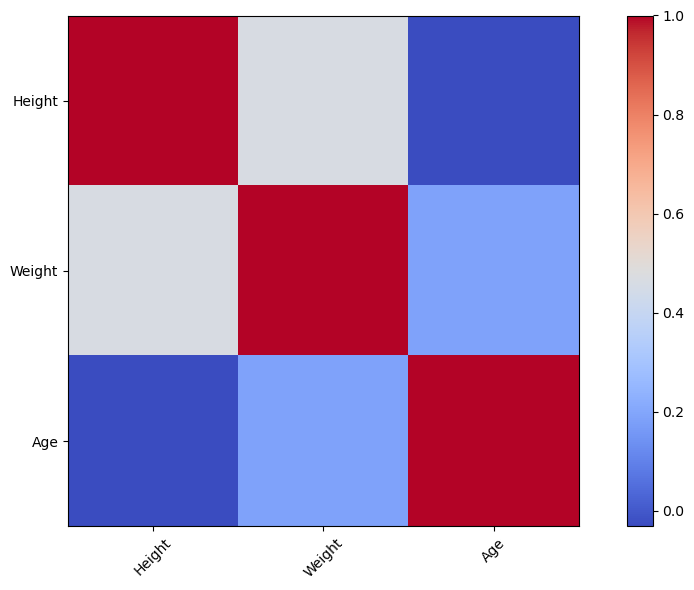

In [11]:
correlation=df[["Height","Weight","Age"]].corr()
plt.figure(figsize=(10, 6))
plt.imshow(correlation,cmap="coolwarm",interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.tight_layout()
plt.show()

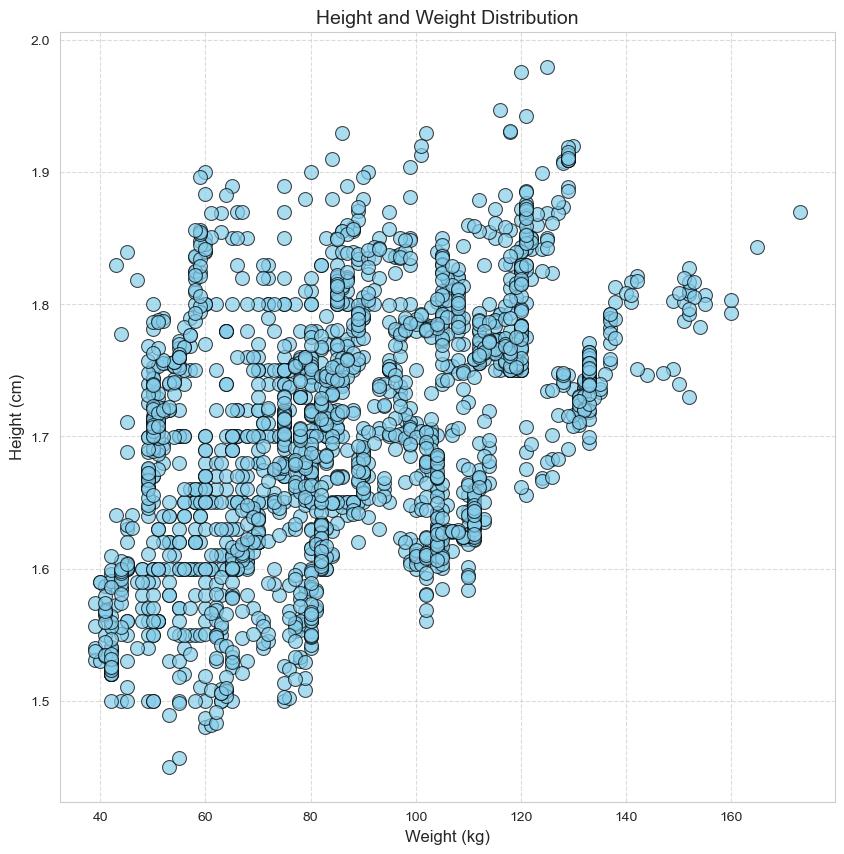

In [12]:
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.scatterplot(x="Weight", y="Height", data=df, color='skyblue', edgecolor='black', s=100, alpha=0.7)
plt.title("Height and Weight Distribution", fontsize=14)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [13]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(df,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(df,columns=columns,drop_first=True,dtype=int)

In [14]:
train.head()

,Age,Height,Weight,CALC,FCVC,NCP,CH2O,FAF,TUE,CAEC,MTRANS,NObeyesdad,'family_history_with_overweight',Gender_1,family_history_with_overweight_yes,FAVC_1,SMOKE_1,SCC_1
0,21,1.62,64,3,2,3,2,0,1,2,3,1,1,0,1,0,0,0
1,21,1.52,56,2,3,3,3,3,0,2,3,1,1,0,1,0,1,1
2,23,1.80,77,1,2,3,2,2,1,2,3,1,1,1,1,0,0,0
3,27,1.80,87,1,3,3,2,2,0,2,4,5,0,1,0,0,0,0
4,22,1.78,89,2,2,1,2,0,0,2,3,6,0,1,0,0,0,0


In [15]:
train["NObeyesdad"].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [16]:
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

In [17]:
train_scaled

,Age,Height,Weight,CALC,FCVC,NCP,CH2O,FAF,TUE,CAEC,MTRANS,'family_history_with_overweight',Gender_1,family_history_with_overweight_yes,FAVC_1,SMOKE_1,SCC_1,NObeyesdad
0,-0.330712,-0.875939,-0.828234,1.389627,-0.372866,0.522233,0.534255,-1.003917,1.389096,0.215047,0.453620,0.472291,-1.011914,0.472291,-2.759769,-0.145900,-0.218272,1
1,-0.330712,-1.943830,-1.196376,-0.496014,1.329279,0.522233,1.943842,1.744588,-0.700565,0.215047,0.453620,0.472291,-1.011914,0.472291,-2.759769,6.853997,4.581439,1
2,0.129988,1.054214,-0.278841,-2.680463,-0.372866,0.522233,0.534255,1.349874,1.389096,0.215047,0.453620,0.472291,0.988227,0.472291,-2.759769,-0.145900,-0.218272,1
3,0.797072,1.054214,0.110836,-2.680463,1.329279,0.522233,0.534255,1.349874,-0.700565,0.215047,2.238614,-2.117337,0.988227,-2.117337,-2.759769,-0.145900,-0.218272,5
4,-0.086903,0.839263,0.185854,-0.496014,-0.372866,-1.641006,0.534255,-1.003917,-0.700565,0.215047,0.453620,-2.117337,0.988227,-2.117337,-2.759769,-0.145900,-0.218272,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.606245,0.095716,1.591214,-0.496014,1.329279,0.522233,-1.229288,0.659949,-0.700565,0.215047,0.453620,0.472291,-1.011914,0.472291,0.362349,-0.145900,-0.218272,4
2107,-0.330712,0.501861,1.651610,-0.496014,1.329279,0.522233,0.534255,0.659949,-0.700565,0.215047,0.453620,0.472291,-1.011914,0.472291,0.362349,-0.145900,-0.218272,4
2108,-0.086903,0.540746,1.651610,-0.496014,1.329279,0.522233,0.534255,0.659949,-0.700565,0.215047,0.453620,0.472291,-1.011914,0.472291,0.362349,-0.145900,-0.218272,4
2109,0.323876,0.403820,1.651610,-0.496014,1.329279,0.522233,0.534255,0.659949,-0.700565,0.215047,0.453620,0.472291,-1.011914,0.472291,0.362349,-0.145900,-0.218272,4


In [18]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [19]:
train_scaled

,Age,Height,Weight,CALC,FCVC,NCP,CH2O,FAF,TUE,CAEC,MTRANS,'family_history_with_overweight',Gender_1,family_history_with_overweight_yes,FAVC_1,SMOKE_1,SCC_1,NObeyesdad
8,0.323876,0.839263,-0.828234,-2.680463,1.329279,0.522233,0.534255,0.659949,1.389096,0.215047,0.45362,0.472291,0.988227,0.472291,0.362349,-0.1459,-0.218272,1
9,-0.086903,0.195136,-0.653334,1.389627,-0.372866,0.522233,0.534255,0.659949,1.389096,0.215047,0.45362,0.472291,0.988227,0.472291,0.362349,-0.1459,-0.218272,1
14,0.129988,0.731833,-1.009045,-0.496014,1.329279,-1.641006,-1.229288,0.659949,1.389096,0.215047,0.45362,0.472291,0.988227,0.472291,0.362349,-0.1459,-0.218272,1
16,0.797072,2.454281,0.652924,-0.496014,-0.372866,-1.641006,-1.229288,0.659949,-0.700565,0.215047,0.45362,0.472291,0.988227,0.472291,0.362349,-0.1459,-0.218272,6
23,-0.086903,-1.089775,-0.080833,-0.496014,-1.970284,-1.641006,0.534255,-1.003917,1.613765,0.215047,0.45362,0.472291,-1.011914,0.472291,0.362349,-0.1459,-0.218272,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.606245,0.095716,1.591214,-0.496014,1.329279,0.522233,-1.229288,0.659949,-0.700565,0.215047,0.45362,0.472291,-1.011914,0.472291,0.362349,-0.1459,-0.218272,4
2107,-0.330712,0.501861,1.651610,-0.496014,1.329279,0.522233,0.534255,0.659949,-0.700565,0.215047,0.45362,0.472291,-1.011914,0.472291,0.362349,-0.1459,-0.218272,4
2108,-0.086903,0.540746,1.651610,-0.496014,1.329279,0.522233,0.534255,0.659949,-0.700565,0.215047,0.45362,0.472291,-1.011914,0.472291,0.362349,-0.1459,-0.218272,4
2109,0.323876,0.403820,1.651610,-0.496014,1.329279,0.522233,0.534255,0.659949,-0.700565,0.215047,0.45362,0.472291,-1.011914,0.472291,0.362349,-0.1459,-0.218272,4


In [20]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Accuracy: 0.9802955665024631
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00        49
           3       1.00      0.97      0.99        39
           4       0.98      1.00      0.99        64
           5       0.84      1.00      0.91        16
           6       1.00      1.00      1.00        24

    accuracy                           0.98       203
   macro avg       0.98      0.92      0.94       203
weighted avg       0.98      0.98      0.98       203



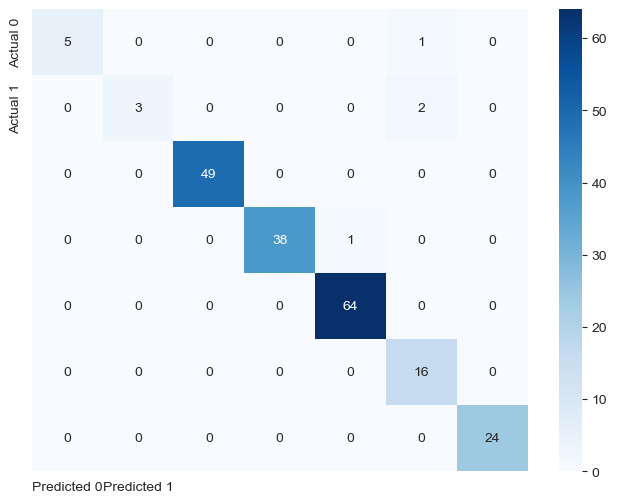

In [24]:
print('Accuracy:', metrics.accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
#Confusion matrix
cm_lr = metrics.confusion_matrix(y_test, rf_pred)

#Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cm_lr, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.show()

Accuracy: 0.916256157635468
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.80      0.80      0.80         5
           2       0.95      0.86      0.90        49
           3       0.84      0.97      0.90        39
           4       1.00      1.00      1.00        64
           5       0.71      0.94      0.81        16
           6       0.95      0.79      0.86        24

    accuracy                           0.92       203
   macro avg       0.89      0.86      0.87       203
weighted avg       0.93      0.92      0.92       203



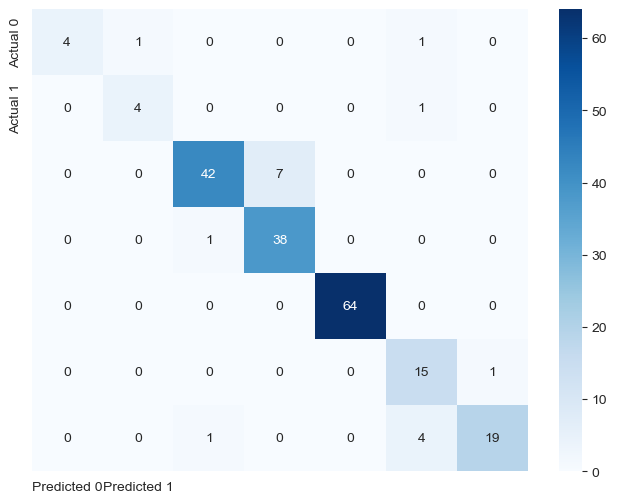

In [25]:
print('Accuracy:', metrics.accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
#Confusion matrix
cm_lr = metrics.confusion_matrix(y_test, lr_pred)

#Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cm_lr, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.show()

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
#Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, knn_pred)

#Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.show()